In [15]:
import pandas as pd
from glob import glob
import os
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

In [16]:
! du -h output/images

^C


In [19]:
IMG_FNS = glob('output/images/*.png')
IDS = {int(os.path.basename(fn).rstrip('.png')) for fn in IMG_FNS}
len(IMG_FNS), len(IDS)

(97640, 97640)

In [20]:
df = pd.read_csv('output/cdli_catalogue_data.csv')

In [21]:
df.period_normed.value_counts()

period_normed
Ur III                  28408
Neo-Assyrian            23453
Old Babylonian          18203
Middle Babylonian        6101
Neo-Babylonian           4946
Old Akkadian             2860
Achaemenid               2152
Early Old Babylonian     2020
ED IIIb                  1823
Middle Assyrian          1525
Old Assyrian             1514
Uruk III                  849
Proto-Elamite             801
Lagash II                 614
Ebla                      459
ED IIIa                   457
uncertain                 355
Hellenistic               247
ED I-II                   238
Middle Elamite            200
Middle Hittite            126
Uruk IV                   122
fake                       99
Pre-Uruk V                 78
Uruk V                     46
Early Neo-Babylonian       11
Neo-Elamite                 2
Linear Elamite              2
Egyptian 0                  2
Sassanian                   1
Harappan                    1
copy                        1
Name: count, dtype: int64

In [22]:
df.shape

(97716, 8)

In [6]:
df.head()

,genre,id,id_text,period,photo_up,subgenre,period_normed,era
0,Lexical,661,713,Uruk III (ca. 3200-3000 BC),600ppi 20160630,Archaic Vessels and Garments (witness),Uruk III,early_bronze
1,Lexical,662,714,Uruk III (ca. 3200-3000 BC),600ppi 20160630,Archaic Geography (witness),Uruk III,early_bronze
2,Lexical,663,723,ED I-II (ca. 2900-2700 BC),600ppi 20160630,ED Lu2 A (witness),ED I-II,early_bronze
3,Lexical,664,724,ED I-II (ca. 2900-2700 BC),600ppi 20160913,Archaic Fish (witness),ED I-II,early_bronze
4,Lexical,668,728,ED I-II (ca. 2900-2700 BC),600ppi 20160630,ED Lu2 A (witness),ED I-II,early_bronze


In [23]:
df[df.era.isna()].period_normed.value_counts()

period_normed
uncertain               355
fake                     99
Pre-Uruk V               78
Uruk V                   46
Early Neo-Babylonian     11
Egyptian 0                2
Sassanian                 1
copy                      1
Name: count, dtype: int64

In [24]:
df_img = df[df.id_text.isin(IDS)].copy()

In [25]:
len(IMG_FNS), df_img.shape[0]

(97640, 97605)

In [26]:
df_img.era.value_counts()

era
early_bronze       36609
iron               30744
mid_late_bronze    29659
Name: count, dtype: int64

In [27]:
def get_fn(ID):
    return f'output/images_preprocessed/{ID}.png'

In [28]:
def pad_zeros(x):
    x_new = str(x)
    return (6-len(x_new))*'0'+x_new

In [29]:
df_img["id_text"] = df_img.id_text.apply(lambda x: pad_zeros(x))

genre                                      NaN
id                                      232497
id_text                                 397837
period           Neo-Assyrian (ca. 911-612 BC)
photo_up                       600ppi 20160630
subgenre                                   NaN
period_normed                     Neo-Assyrian
era                                       iron
Name: 72211, dtype: object


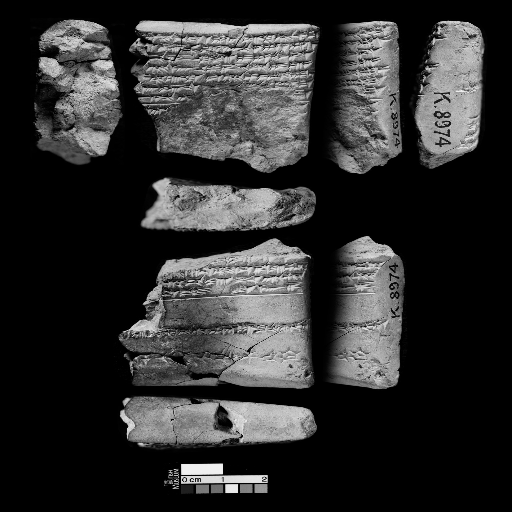

In [92]:
row = df_img.sample().iloc[0]
print(row)
fn = get_fn(row.id_text)
Image.open(fn)